In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive

train_transaction=pd.read_csv("/content/drive/MyDrive/train_transaction.csv")
train_identity=pd.read_csv("/content/drive/MyDrive/train_identity.csv")
train_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
test_transaction=pd.read_csv('/content/drive/MyDrive/test_transaction.csv')
test_identity=pd.read_csv('/content/drive/MyDrive/test_identity.csv')

In [5]:
train_transaction.columns.tolist()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [6]:
train_identity.columns.tolist()

['TransactionID',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [7]:
train=train_transaction.merge(train_identity, how='left',on='TransactionID')

In [8]:
test=test_transaction.merge(test_identity, how='left',on='TransactionID')

In [9]:
object_columns = train.select_dtypes(include=['object']).columns

# 객체 열을 범주 데이터 유형으로 변환
train[object_columns] = train[object_columns].astype('category')

print(train.dtypes)

TransactionID        int64
isFraud              int64
TransactionDT        int64
TransactionAmt     float64
ProductCD         category
                    ...   
id_36             category
id_37             category
id_38             category
DeviceType        category
DeviceInfo        category
Length: 434, dtype: object


In [10]:
data_types_dict = train.dtypes.to_dict()
print(data_types_dict)

{'TransactionID': dtype('int64'), 'isFraud': dtype('int64'), 'TransactionDT': dtype('int64'), 'TransactionAmt': dtype('float64'), 'ProductCD': CategoricalDtype(categories=['C', 'H', 'R', 'S', 'W'], ordered=False, categories_dtype=object), 'card1': dtype('int64'), 'card2': dtype('float64'), 'card3': dtype('float64'), 'card4': CategoricalDtype(categories=['american express', 'discover', 'mastercard', 'visa'], ordered=False, categories_dtype=object), 'card5': dtype('float64'), 'card6': CategoricalDtype(categories=['charge card', 'credit', 'debit', 'debit or credit'], ordered=False, categories_dtype=object), 'addr1': dtype('float64'), 'addr2': dtype('float64'), 'dist1': dtype('float64'), 'dist2': dtype('float64'), 'P_emaildomain': CategoricalDtype(categories=['aim.com', 'anonymous.com', 'aol.com', 'att.net',
                  'bellsouth.net', 'cableone.net', 'centurylink.net',
                  'cfl.rr.com', 'charter.net', 'comcast.net', 'cox.net',
                  'earthlink.net', 'embar

### 모델링

In [11]:
X = train.drop(columns=['isFraud'])
y= train['isFraud']

In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 590540 entries, 0 to 590539
Series name: isFraud
Non-Null Count   Dtype
--------------   -----
590540 non-null  int64
dtypes: int64(1)
memory usage: 4.5 MB


In [13]:
unique_values = y.unique()
print(unique_values)

[0 1]


GPU 사용 가능 여부: True
🚀 GPU RandomForest Accuracy: 96.93275081563768


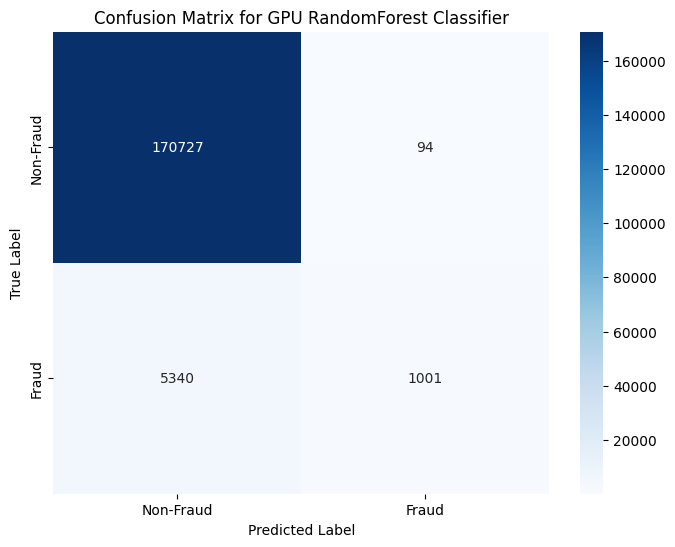

              precision    recall  f1-score   support

   Non-Fraud       0.97      1.00      0.98    170821
       Fraud       0.91      0.16      0.27      6341

    accuracy                           0.97    177162
   macro avg       0.94      0.58      0.63    177162
weighted avg       0.97      0.97      0.96    177162



In [15]:
from cuml.ensemble import RandomForestClassifier as cuRF  # ✅ cuML 사용
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🚀 GPU 확인 (cuML을 사용하려면 NVIDIA GPU가 필요함)
import torch
print("GPU 사용 가능 여부:", torch.cuda.is_available())
if not torch.cuda.is_available():
    raise ValueError("🚨 GPU가 활성화되지 않았습니다. Colab에서 런타임 유형을 GPU로 변경하세요!")

# 🚨 범주형 변수 처리: One-Hot Encoding
X = pd.get_dummies(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ NumPy 배열로 변환 (cuML은 Pandas DataFrame보다 NumPy를 더 잘 지원함)
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# ✅ GPU RandomForest 모델 생성 및 학습 (cuML)
rf_model = cuRF(n_estimators=100, max_depth=10, random_state=42)  # ✅ cuML RandomForest 사용
rf_model.fit(X_train_np, y_train_np)

# ✅ 테스트 데이터 예측 (GPU 활용)
y_pred = rf_model.predict(X_test_np)

# ✅ 정확도 계산
accuracy = accuracy_score(y_test_np, y_pred)
print("🚀 GPU RandomForest Accuracy:", accuracy * 100)

# ✅ 혼동 행렬 계산
cm = confusion_matrix(y_test_np, y_pred)

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GPU RandomForest Classifier')
plt.show()

# ✅ 분류 보고서 출력
report = classification_report(y_test_np, y_pred, target_names=['Non-Fraud', 'Fraud'])
print(report)


GPU 사용 가능 여부: True
[2025-03-13 05:20:59.770] [CUML] [error] L-BFGS error fx=nan at iteration 1; stopping at the last valid step
🚀 GPU Logistic Regression Accuracy: 96.42079001140199


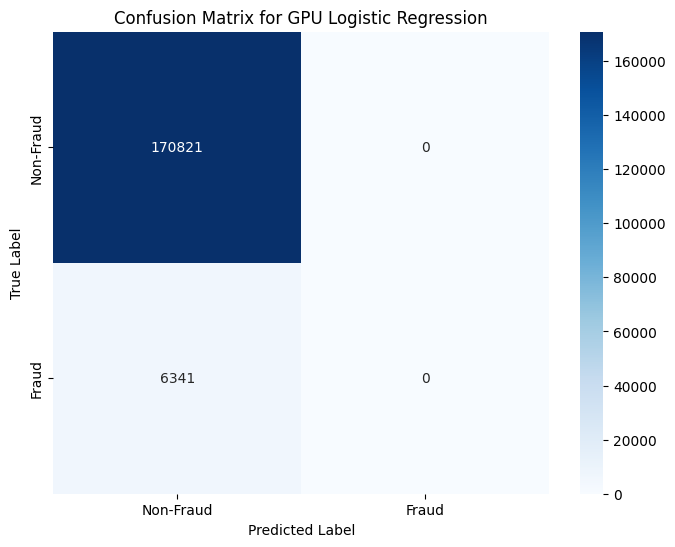

              precision    recall  f1-score   support

   Non-Fraud       0.96      1.00      0.98    170821
       Fraud       0.00      0.00      0.00      6341

    accuracy                           0.96    177162
   macro avg       0.48      0.50      0.49    177162
weighted avg       0.93      0.96      0.95    177162



In [14]:
from cuml.linear_model import LogisticRegression as cuLR  # ✅ cuML Logistic Regression 사용
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# 🚀 GPU 확인 (cuML을 사용하려면 NVIDIA GPU가 필요함)
print("GPU 사용 가능 여부:", torch.cuda.is_available())
if not torch.cuda.is_available():
    raise ValueError("🚨 GPU가 활성화되지 않았습니다. Colab에서 런타임 유형을 GPU로 변경하세요!")

# 🚨 범주형 변수 처리: One-Hot Encoding
X = pd.get_dummies(X)

# ✅ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ NumPy 배열로 변환 (cuML은 Pandas보다 NumPy를 더 잘 지원함)
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# ✅ GPU Logistic Regression 모델 생성 및 학습 (cuML)
lr_model = cuLR()
lr_model.fit(X_train_np, y_train_np)

# ✅ 테스트 데이터 예측 (GPU 활용)
y_pred = lr_model.predict(X_test_np)

# ✅ 정확도 계산
accuracy = accuracy_score(y_test_np, y_pred)
print("🚀 GPU Logistic Regression Accuracy:", accuracy * 100)

# ✅ 혼동 행렬 계산
cm = confusion_matrix(y_test_np, y_pred)

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GPU Logistic Regression')
plt.show()

# ✅ 분류 보고서 출력
report = classification_report(y_test_np, y_pred, target_names=['Non-Fraud', 'Fraud'])
print(report)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🚨 범주형 변수 처리: One-Hot Encoding (더 안정적인 방법)
X = pd.get_dummies(X)  # 문자열 데이터를 숫자로 변환 (One-Hot Encoding)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 97.80201171808854


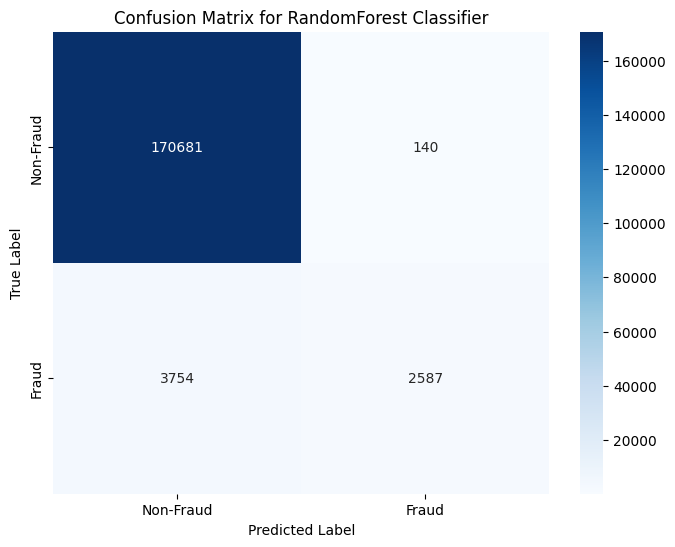

              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170821
       Fraud       0.95      0.41      0.57      6341

    accuracy                           0.98    177162
   macro avg       0.96      0.70      0.78    177162
weighted avg       0.98      0.98      0.97    177162



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🚨 범주형 변수 처리: One-Hot Encoding (더 안정적인 방법)
X = pd.get_dummies(X)  # 문자열 데이터를 숫자로 변환 (One-Hot Encoding)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForest 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # ✅ 여기서 더 이상 오류가 발생하지 않음

# 테스트 데이터 예측
y_pred = rf_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.show()

# 분류 보고서 출력
report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])
print(report)


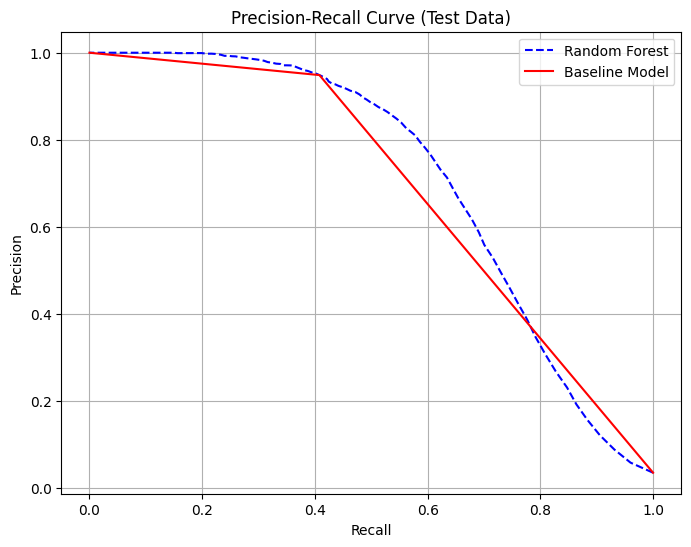

In [16]:
from sklearn.metrics import precision_recall_curve

# ✅ 검증 데이터에서 예측 확률값 추출
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# ✅ Precision-Recall Curve 출력
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_proba_rf)
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_pred)  # 기존 예측값 기준

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label="Random Forest", linestyle="--", color="blue")
plt.plot(recall_baseline, precision_baseline, label="Baseline Model", linestyle="-", color="red")
plt.title("Precision-Recall Curve (Test Data)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


In [1]:
import torch
print("GPU 사용 가능 여부:", torch.cuda.is_available())
print("사용 중인 GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "GPU 없음")

GPU 사용 가능 여부: True
사용 중인 GPU: Tesla T4


In [ ]:
# NaN 개수 확인
print("📌 X_train NaN 개수:", X_train.isna().sum().sum())

# NaN이 포함된 컬럼 리스트 출력
nan_columns = X_train.columns[X_train.isna().sum() > 0].tolist()
print(f"🚨 NaN 포함된 컬럼: {nan_columns}")

📌 X_train NaN 개수: 0
🚨 NaN 포함된 컬럼: []


In [ ]:
from sklearn.impute import SimpleImputer

# 🚨 1. NaN 개수 확인
print("📌 X_train NaN 개수 (처리 전):", X_train.isna().sum().sum())

# 🚨 2. NaN을 중앙값(median)으로 채우기
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 🚨 3. NaN이 제거되었는지 다시 확인 (이제 0이 나와야 정상)
print("📌 NaN 제거 후 확인:", X_train.isna().sum().sum())

# 🚨 4. 만약 NaN이 여전히 남아 있다면, 모든 NaN을 0으로 강제 채우기
if X_train.isna().sum().sum() > 0:
    print("🚨 NaN이 남아 있음! → 0으로 강제 변환")
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)

# 🚨 5. 최종 확인
print("📌 최종 NaN 개수:", X_train.isna().sum().sum())  # → 반드시 0이 되어야 함


📌 X_train NaN 개수 (처리 전): 72920022


[LightGBM] [Info] Number of positive: 139620, number of negative: 279239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.701055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101219
[LightGBM] [Info] Number of data points in the train set: 418859, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333334 -> initscore=-0.693144
[LightGBM] [Info] Start training from score -0.693144
🚀 최적화된 모델의 정확도: 98.63%


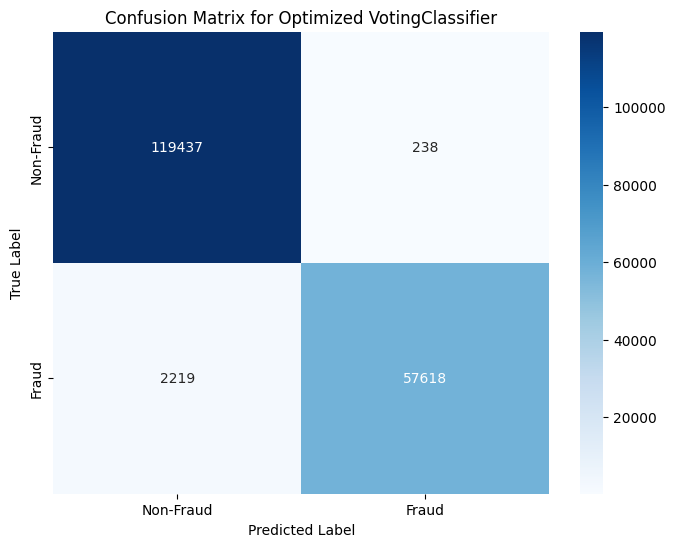

              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    119675
       Fraud       1.00      0.96      0.98     59837

    accuracy                           0.99    179512
   macro avg       0.99      0.98      0.98    179512
weighted avg       0.99      0.99      0.99    179512



In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ✅ 1️⃣ Test 데이터 병합
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# ✅ 2️⃣ 모델 평가용 데이터(`X_val`) 분리
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.3, random_state=42, stratify=y_train_resampled
)

# ✅ 3️⃣ Optuna로 최적화된 RandomForest 모델
rf_best_model = RandomForestClassifier(
    n_estimators=350,  # ✅ 최적화된 값 적용
    max_depth=9,
    min_samples_split=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# ✅ 4️⃣ Optuna로 최적화된 XGBoost 모델
xgb_model = XGBClassifier(
    n_estimators=350,  # ✅ 최적화된 값 적용
    learning_rate=0.0964,
    max_depth=9,
    random_state=42,
    tree_method='gpu_hist'  # GPU 사용 가능하면 활성화
)

# ✅ 5️⃣ Optuna로 최적화된 LightGBM 모델
lgbm_model = LGBMClassifier(
    n_estimators=350,  # ✅ 최적화된 값 적용
    learning_rate=0.0964,
    max_depth=9,
    random_state=42
)

# ✅ 6️⃣ Soft Voting 앙상블 모델 생성
voting_model = VotingClassifier(
    estimators=[('rf', rf_best_model), ('xgb', xgb_model), ('lgbm', lgbm_model)],
    voting='soft'  # ✅ Soft Voting: 확률 기반 앙상블
)

# ✅ 7️⃣ 모델 학습 (훈련 데이터 사용)
voting_model.fit(X_train_final, y_train_final)

# ✅ 8️⃣ 모델 평가용 데이터(`X_val`)로 예측
y_pred_val = voting_model.predict(X_val)

# ✅ 9️⃣ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_val)
print(f"🚀 최적화된 모델의 정확도: {accuracy * 100:.2f}%")

# ✅ 🔟 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized VotingClassifier')
plt.show()

# ✅ 1️⃣1️⃣ 분류 보고서 출력
print(classification_report(y_val, y_pred_val, target_names=['Non-Fraud', 'Fraud']))

from sklearn.preprocessing import LabelEncoder

# ✅ 1️⃣2️⃣ **테스트 데이터 전처리 (결측값 채우기)**
test.fillna(0, inplace=True)  # NaN을 0으로 채움

# ✅ 1️⃣3️⃣ **Label Encoding 적용 (훈련 데이터와 동일하게)**
for col in X_train_final.select_dtypes(include=['object']).columns:
    if col in test.columns:  # 테스트 데이터에도 해당 컬럼이 있을 경우만 적용
        le = LabelEncoder()
        test[col] = le.fit_transform(test[col].astype(str))  # ✅ 강제 변환

# ✅ 1️⃣4️⃣ **Feature 정렬 (훈련 데이터와 일치시키기)**
X_test_final = test.drop(columns=['TransactionID'], errors='ignore')  # 불필요한 컬럼 제거
X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)  # ✅ Feature 정렬 및 누락된 컬럼 채우기

# ✅ 1️⃣5️⃣ **모델로 테스트 데이터 예측**
test_predictions = voting_model.predict_proba(X_test_final)[:, 1]  # Fraud 확률 예측

# ✅ 1️⃣6️⃣ **Kaggle 제출용 DataFrame 생성**
submission = pd.DataFrame({
    "TransactionID": test["TransactionID"],
    "isFraud": test_predictions
})

# ✅ 1️⃣7️⃣ **CSV 저장**
submission.to_csv("submission.csv", index=False)
print("✅ 제출 파일 'submission.csv' 저장 완료!")





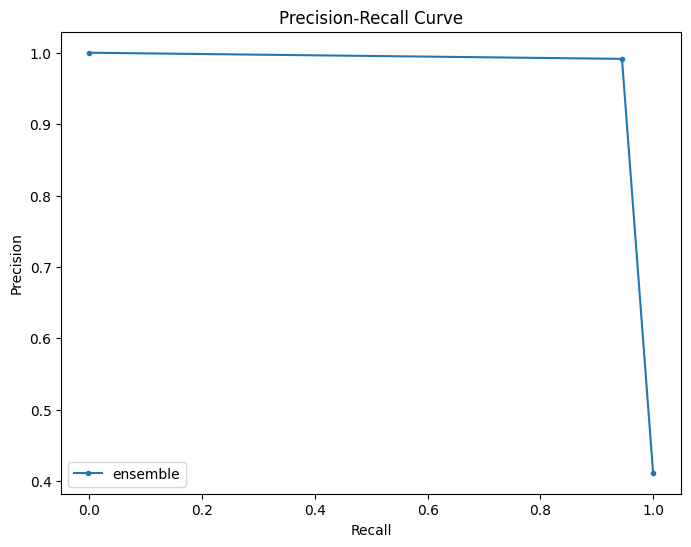

In [ ]:
from sklearn.metrics import precision_recall_curve

# 🚀 Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val)

# 🚀 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[LightGBM] [Info] Number of positive: 83772, number of negative: 279239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12414
[LightGBM] [Info] Number of data points in the train set: 363011, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230770 -> initscore=-1.203969
[LightGBM] [Info] Start training from score -1.203969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🚀 최적화된 모델의 정확도: 92.74%


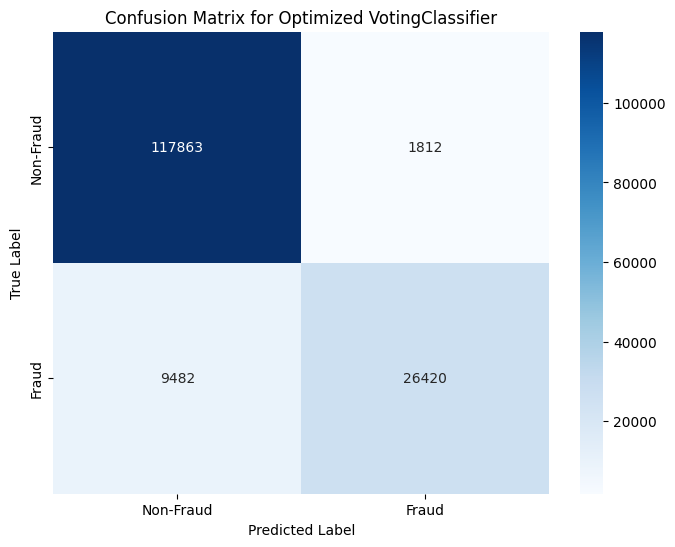

              precision    recall  f1-score   support

   Non-Fraud       0.93      0.98      0.95    119675
       Fraud       0.94      0.74      0.82     35902

    accuracy                           0.93    155577
   macro avg       0.93      0.86      0.89    155577
weighted avg       0.93      0.93      0.92    155577



In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 1️⃣ SMOTE 비율 낮추기 (0.5 → 0.3)
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ✅ 2️⃣ 모델 평가용 데이터(`X_val`) 분리
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.3, random_state=42, stratify=y_train_resampled
)

# ✅ 먼저 RandomForestClassifier 학습
rf_best_model.fit(X_train_resampled, y_train_resampled)

# ✅ 학습된 모델에서 Feature Importance 추출
feature_importance = pd.Series(rf_best_model.feature_importances_, index=X_train.columns)

# ✅ 중요도 높은 상위 50개 Feature 선택
top_features = feature_importance.nlargest(50).index

# ✅ Feature Selection 적용
X_train_final = X_train_final[top_features]
X_val = X_val[top_features]

# ✅ 4️⃣ SMOTE + Optuna가 적용된 RandomForest 모델 (깊이 제한 조정)
rf_best_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,  # ✅ 트리 깊이 제한 (15 → 10)
    min_samples_split=5,
    min_samples_leaf=5,  # ✅ 최소 샘플 개수 증가 (과적합 방지)
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# ✅ 5️⃣ XGBoost 모델 생성 (learning_rate 낮추기)
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

# ✅ 6️⃣ LightGBM 모델 생성 (learning_rate 낮추기)
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

# ✅ 7️⃣ Logistic Regression 추가 (다양성 확보)
logreg_model = LogisticRegression()

# ✅ 8️⃣ Soft Voting 앙상블 모델 생성
voting_model = VotingClassifier(
    estimators=[('rf', rf_best_model), ('xgb', xgb_model), ('lgbm', lgbm_model), ('logreg', logreg_model)],
    voting='soft'
)

# ✅ 모델 학습 (훈련 데이터 사용)
voting_model.fit(X_train_final, y_train_final)

# ✅ 모델 평가용 데이터(`X_val`)로 예측
y_pred_val = voting_model.predict(X_val)

# ✅ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_val)
print(f"🚀 최적화된 모델의 정확도: {accuracy * 100:.2f}%")

# ✅ 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized VotingClassifier')
plt.show()

# ✅ 분류 보고서 출력 (과적합 방지 후 성능 확인)
print(classification_report(y_val, y_pred_val, target_names=['Non-Fraud', 'Fraud']))


In [ ]:
import numpy as np

# ✅ 1️⃣ F1-score 계산
f1_scores = (2 * precision * recall) / (precision + recall + 1e-10)  # 분모가 0이 되는 것 방지

# ✅ 2️⃣ 최적 Threshold 찾기
best_threshold_index = np.argmax(f1_scores)  # F1-score가 가장 높은 위치
best_threshold = thresholds[best_threshold_index]

print(f"🚀 최적 Decision Threshold: {best_threshold:.4f}")

🚀 최적 Decision Threshold: 1.0000


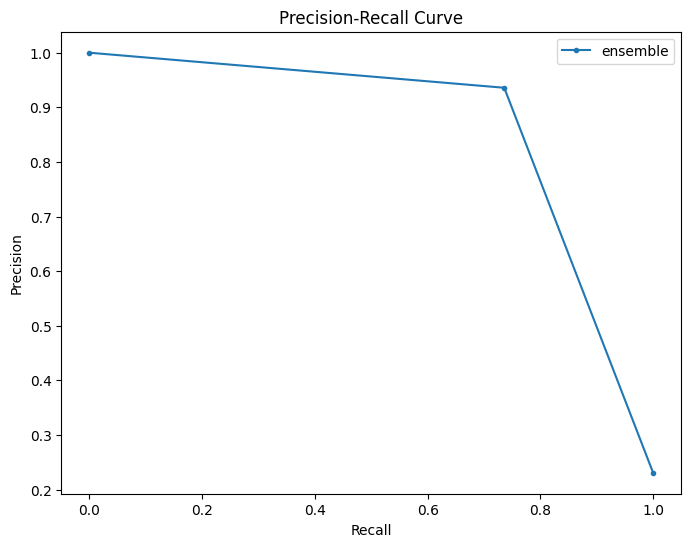

In [ ]:
from sklearn.metrics import precision_recall_curve

# 🚀 Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val)

# 🚀 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Threshold 튜닝을 위한 Precision-Recall Curve 그리기
from sklearn.metrics import precision_recall_curve
import numpy as np

y_prob = voting_model.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

# 최적 임계값 찾기
best_idx = np.argmax(precision * recall)  # Precision과 Recall이 균형을 이루는 지점
best_threshold = thresholds[best_idx]
print(f"🚀 최적 Decision Threshold: {best_threshold:.2f}")

🚀 최적 Decision Threshold: 0.45


[LightGBM] [Info] Number of positive: 83772, number of negative: 279239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.366045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103353
[LightGBM] [Info] Number of data points in the train set: 363011, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230770 -> initscore=-1.203969
[LightGBM] [Info] Start training from score -1.203969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🚀 최적 Threshold(0.45) 적용 후 정확도: 93.20%


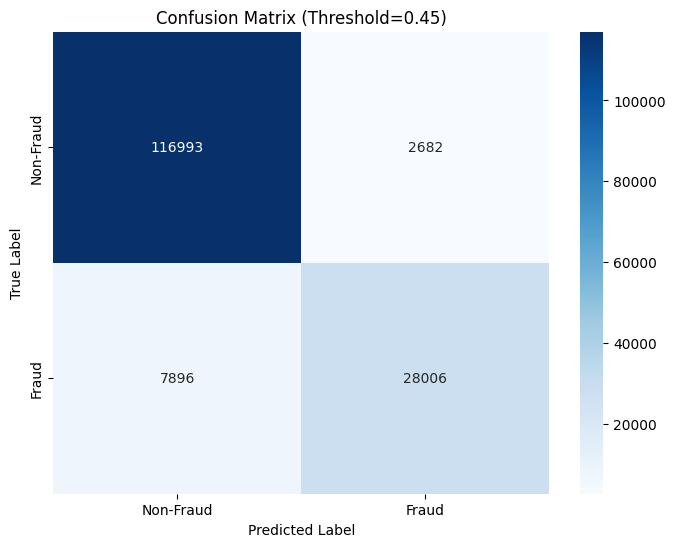

              precision    recall  f1-score   support

   Non-Fraud       0.94      0.98      0.96    119675
       Fraud       0.91      0.78      0.84     35902

    accuracy                           0.93    155577
   macro avg       0.92      0.88      0.90    155577
weighted avg       0.93      0.93      0.93    155577



In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warning


# ✅ 모델 평가용 데이터(`X_val`) 분리
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.3, random_state=42, stratify=y_train_resampled
)

# ✅ SMOTE + Optuna가 적용된 RandomForest 모델 (깊이 제한 조정)
rf_best_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# ✅ XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

# ✅ LightGBM 모델 생성
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

# ✅ Logistic Regression 추가 (다양성 확보)
logreg_model = LogisticRegression()

# ✅ Soft Voting 앙상블 모델 생성
voting_model = VotingClassifier(
    estimators=[('rf', rf_best_model), ('xgb', xgb_model), ('lgbm', lgbm_model), ('logreg', logreg_model)],
    voting='soft'
)

# ✅ 모델 학습 (훈련 데이터 사용)
voting_model.fit(X_train_final, y_train_final)

# ✅ 모델 평가용 데이터(`X_val`)로 예측 (확률값 가져오기)
y_pred_prob = voting_model.predict_proba(X_val)[:, 1]  # Fraud 확률 가져오기

# ✅ 🚀 최적 Threshold = 0.45 적용하여 이진 분류
threshold = 0.45
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# ✅ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_adjusted)
print(f"🚀 최적 Threshold({threshold}) 적용 후 정확도: {accuracy * 100:.2f}%")

# ✅ 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()

# ✅ 분류 보고서 출력 (과적합 방지 후 성능 확인)
print(classification_report(y_val, y_pred_adjusted, target_names=['Non-Fraud', 'Fraud']))


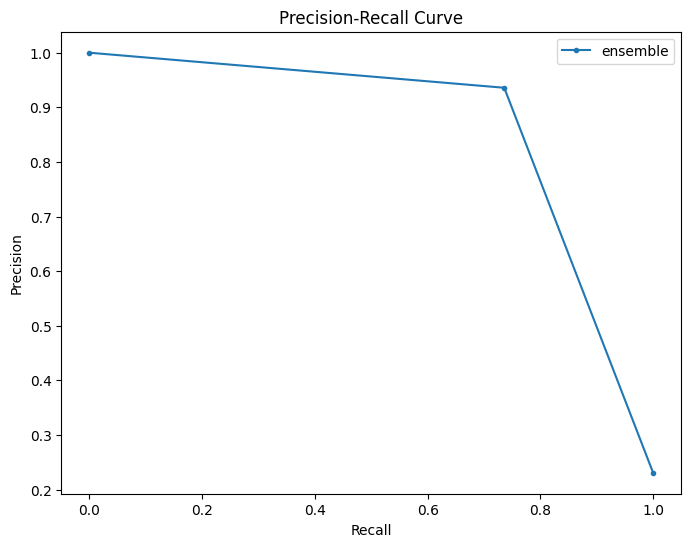

In [ ]:
from sklearn.metrics import precision_recall_curve

# 🚀 Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val)

# 🚀 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

[LightGBM] [Info] Number of positive: 83772, number of negative: 279239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.383745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103353
[LightGBM] [Info] Number of data points in the train set: 363011, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230770 -> initscore=-1.203969
[LightGBM] [Info] Start training from score -1.203969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

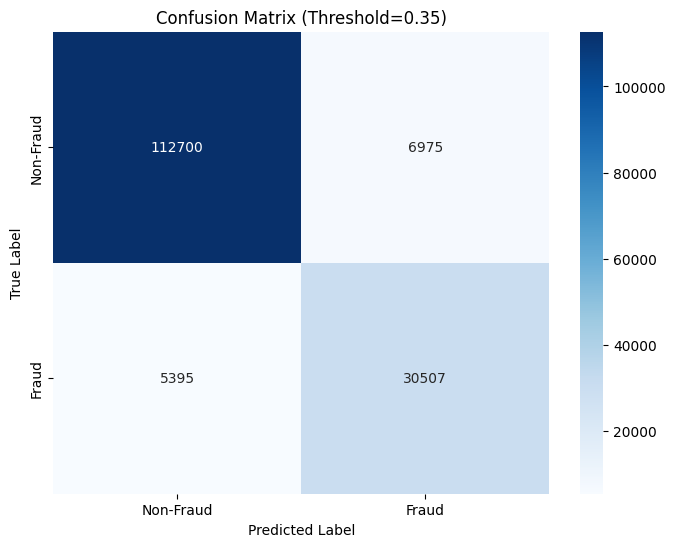

              precision    recall  f1-score   support

   Non-Fraud       0.95      0.94      0.95    119675
       Fraud       0.81      0.85      0.83     35902

    accuracy                           0.92    155577
   macro avg       0.88      0.90      0.89    155577
weighted avg       0.92      0.92      0.92    155577



In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# ✅ 모델 평가용 데이터(`X_val`) 분리
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.3, random_state=42, stratify=y_train_resampled
)

# ✅ SMOTE + Optuna가 적용된 RandomForest 모델 (깊이 제한 조정)
rf_best_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# ✅ XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

# ✅ LightGBM 모델 생성
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)

# ✅ Logistic Regression 추가 (다양성 확보)
logreg_model = LogisticRegression()

# ✅ Soft Voting 앙상블 모델 생성
voting_model = VotingClassifier(
    estimators=[('rf', rf_best_model), ('xgb', xgb_model), ('lgbm', lgbm_model), ('logreg', logreg_model)],
    voting='soft'
)

# ✅ 모델 학습 (훈련 데이터 사용)
voting_model.fit(X_train_final, y_train_final)

# ✅ 모델 평가용 데이터(`X_val`)로 예측 (확률값 가져오기)
y_pred_prob = voting_model.predict_proba(X_val)[:, 1]  # Fraud 확률 가져오기

# ✅ 🚀 최적 Threshold = 0.45 적용하여 이진 분류
threshold = 0.35
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# ✅ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_adjusted)
print(f"🚀 최적 Threshold({threshold}) 적용 후 정확도: {accuracy * 100:.2f}%")

# ✅ 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()

# ✅ 분류 보고서 출력 (과적합 방지 후 성능 확인)
print(classification_report(y_val, y_pred_adjusted, target_names=['Non-Fraud', 'Fraud']))


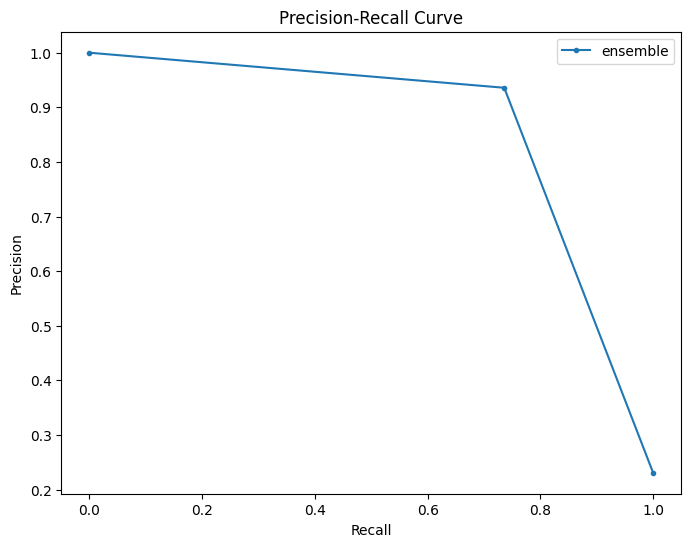

In [ ]:
from sklearn.metrics import precision_recall_curve

# 🚀 Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val)

# 🚀 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

🚀 GPU 사용 가능 여부: True
🔥 사용 중인 GPU: Tesla T4
🚨 문자형(범주형) 데이터 컬럼: []
📌 NaN 개수 확인 (변환 후): 0
[LightGBM] [Info] Number of positive: 14464, number of negative: 398914
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.326234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39071
[LightGBM] [Info] Number of data points in the train set: 413378, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034990 -> initscore=-3.317083
[LightGBM] [Info] Start training from score -3.317083
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

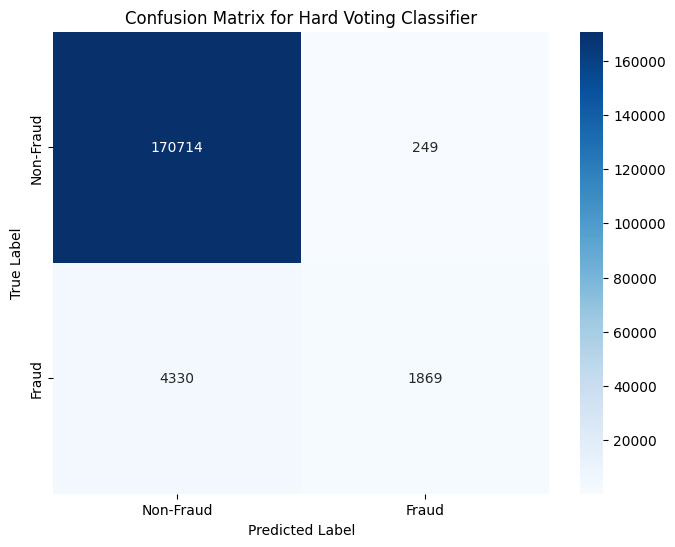

              precision    recall  f1-score   support

   Non-Fraud       0.98      1.00      0.99    170963
       Fraud       0.88      0.30      0.45      6199

    accuracy                           0.97    177162
   macro avg       0.93      0.65      0.72    177162
weighted avg       0.97      0.97      0.97    177162



In [19]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np

# ✅ GPU 활성화 확인
print("🚀 GPU 사용 가능 여부:", torch.cuda.is_available())
print("🔥 사용 중인 GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU 사용 중")

# ✅ 1️⃣ Categorical 타입을 문자열로 변환 (Label Encoding 전처리)
for col in X.select_dtypes(include=['category']).columns:
    print(f"🚨 {col} 컬럼이 Categorical 타입 → 문자열로 변환")
    X[col] = X[col].astype(str)

# ✅ 2️⃣ Label Encoding 적용 (모든 범주형 데이터 변환)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("🚨 문자형(범주형) 데이터 컬럼:", categorical_cols)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Label Encoding 적용
    label_encoders[col] = le  # 인코딩 정보 저장

# ✅ 3️⃣ 데이터 타입 강제 변환 (숫자로 변환되지 않은 값 처리)
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"🚨 {col} 컬럼이 object 타입으로 남아 있음. 강제 변환 중...")
        X[col] = X[col].astype(str)  # 문자열로 변환 후
        X[col] = pd.to_numeric(X[col], errors='coerce')  # 숫자로 변환, 변환 불가능한 값은 NaN 처리

# ✅ 4️⃣ NaN 값 확인 및 처리 (모든 결측값을 0으로 채움)
print("📌 NaN 개수 확인 (변환 후):", X.isna().sum().sum())  # NaN 개수 확인
X.fillna(0, inplace=True)  # NaN을 0으로 채움

# ✅ 5️⃣ Train-Test Split (SMOTE 적용 X, 원본 데이터 사용)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ 6️⃣ GPU 가속 적용된 XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42,
                          tree_method='gpu_hist' if torch.cuda.is_available() else 'hist')

# ✅ LightGBM 모델 생성 (GPU 문제 해결 → CPU 모드로 실행)
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42,
                            device='cpu')  # ✅ 강제로 CPU 모드 사용

# ✅ 8️⃣ RandomForest 모델 (GPU 지원 없음, 대신 병렬 연산 최적화)
rf_best_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1  # ✅ 병렬 연산 활성화
)

# ✅ 9️⃣ Logistic Regression 추가 (GPU 지원 없음, 병렬 연산 최적화)
logreg_model = LogisticRegression(class_weight="balanced", solver='lbfgs', max_iter=500, n_jobs=-1)

# ✅ 🔟 Hard Voting 앙상블 모델 생성
hard_voting_model = VotingClassifier(
    estimators=[('rf', rf_best_model), ('xgb', xgb_model), ('lgbm', lgbm_model), ('logreg', logreg_model)],
    voting='hard'
)

# ✅ 1️⃣1️⃣ 모델 학습
hard_voting_model.fit(X_train_final, y_train_final)

# ✅ 1️⃣2️⃣ 모델 평가용 데이터(`X_val`)로 예측
y_pred_hard = hard_voting_model.predict(X_val)

# ✅ 1️⃣3️⃣ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_hard)
print(f"🚀 Hard Voting 적용 후 정확도: {accuracy * 100:.2f}%")

# ✅ 1️⃣4️⃣ 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_hard)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Hard Voting Classifier')
plt.show()

# ✅ 1️⃣5️⃣ 분류 보고서 출력
print(classification_report(y_val, y_pred_hard, target_names=['Non-Fraud', 'Fraud']))


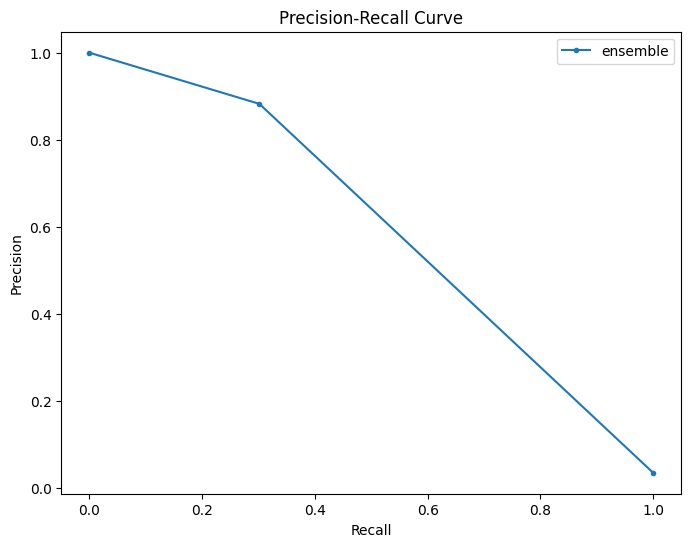

In [20]:
from sklearn.metrics import precision_recall_curve

# 🚀 Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_hard)

# 🚀 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

🚀 GPU 사용 가능 여부: True
🔥 사용 중인 GPU: Tesla T4
🚨 문자형(범주형) 데이터 컬럼: []
📌 NaN 개수 확인 (변환 후): 0
[LightGBM] [Info] Number of positive: 14464, number of negative: 398914
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.479466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39071
[LightGBM] [Info] Number of data points in the train set: 413378, number of used features: 432
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034990 -> initscore=-3.317083
[LightGBM] [Info] Start training from score -3.317083
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

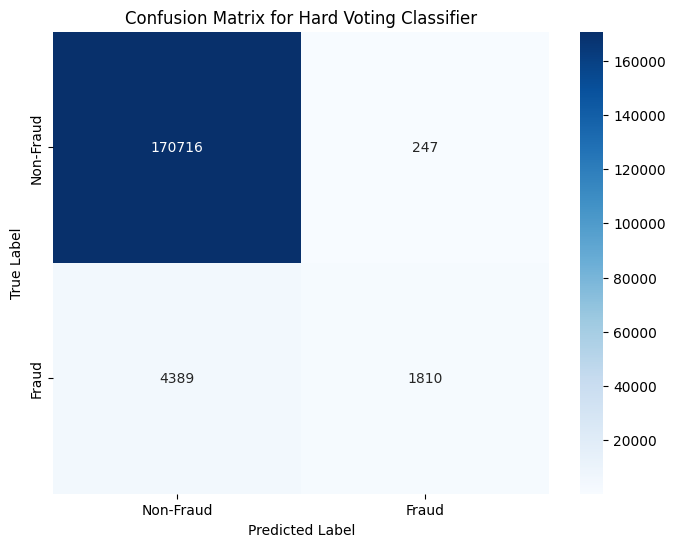

              precision    recall  f1-score   support

   Non-Fraud       0.97      1.00      0.99    170963
       Fraud       0.88      0.29      0.44      6199

    accuracy                           0.97    177162
   macro avg       0.93      0.65      0.71    177162
weighted avg       0.97      0.97      0.97    177162



In [21]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np

# ✅ GPU 활성화 확인
print("🚀 GPU 사용 가능 여부:", torch.cuda.is_available())
print("🔥 사용 중인 GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU 사용 중")

# ✅ 1️⃣ Categorical 타입을 문자열로 변환 (Label Encoding 전처리)
for col in X.select_dtypes(include=['category']).columns:
    print(f"🚨 {col} 컬럼이 Categorical 타입 → 문자열로 변환")
    X[col] = X[col].astype(str)

# ✅ 2️⃣ Label Encoding 적용 (모든 범주형 데이터 변환)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("🚨 문자형(범주형) 데이터 컬럼:", categorical_cols)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Label Encoding 적용
    label_encoders[col] = le  # 인코딩 정보 저장

# ✅ 3️⃣ 데이터 타입 강제 변환 (숫자로 변환되지 않은 값 처리)
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"🚨 {col} 컬럼이 object 타입으로 남아 있음. 강제 변환 중...")
        X[col] = X[col].astype(str)  # 문자열로 변환 후
        X[col] = pd.to_numeric(X[col], errors='coerce')  # 숫자로 변환, 변환 불가능한 값은 NaN 처리

# ✅ 4️⃣ NaN 값 확인 및 처리 (모든 결측값을 0으로 채움)
print("📌 NaN 개수 확인 (변환 후):", X.isna().sum().sum())  # NaN 개수 확인
X.fillna(0, inplace=True)  # NaN을 0으로 채움

# ✅ 5️⃣ Train-Test Split (SMOTE 적용 X, 원본 데이터 사용)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ 6️⃣ GPU 가속 적용된 XGBoost 모델 생성
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=4, random_state=42,
                          tree_method='gpu_hist' if torch.cuda.is_available() else 'hist')

# ✅ 8️⃣ RandomForest 모델 (GPU 지원 없음, 대신 병렬 연산 최적화)
rf_best_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1  # ✅ 병렬 연산 활성화
)

# ✅ 9️⃣ Logistic Regression 추가 (GPU 지원 없음, 병렬 연산 최적화)
logreg_model = LogisticRegression(class_weight="balanced", solver='lbfgs', max_iter=300, n_jobs=-1)

# ✅ 🔟 Hard Voting 앙상블 모델 생성
hard_voting_model = VotingClassifier(
    estimators=[('rf', rf_best_model), ('xgb', xgb_model), ('lgbm', lgbm_model), ('logreg', logreg_model)],
    voting='hard'
)

# ✅ 1️⃣1️⃣ 모델 학습
hard_voting_model.fit(X_train_final, y_train_final)

# ✅ 1️⃣2️⃣ 모델 평가용 데이터(`X_val`)로 예측
y_pred_hard = hard_voting_model.predict(X_val)

# ✅ 1️⃣3️⃣ 정확도 계산
accuracy = accuracy_score(y_val, y_pred_hard)
print(f"🚀 Hard Voting 적용 후 정확도: {accuracy * 100:.2f}%")

# ✅ 1️⃣4️⃣ 혼동 행렬 출력
cm = confusion_matrix(y_val, y_pred_hard)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Hard Voting Classifier')
plt.show()

# ✅ 1️⃣5️⃣ 분류 보고서 출력
print(classification_report(y_val, y_pred_hard, target_names=['Non-Fraud', 'Fraud']))


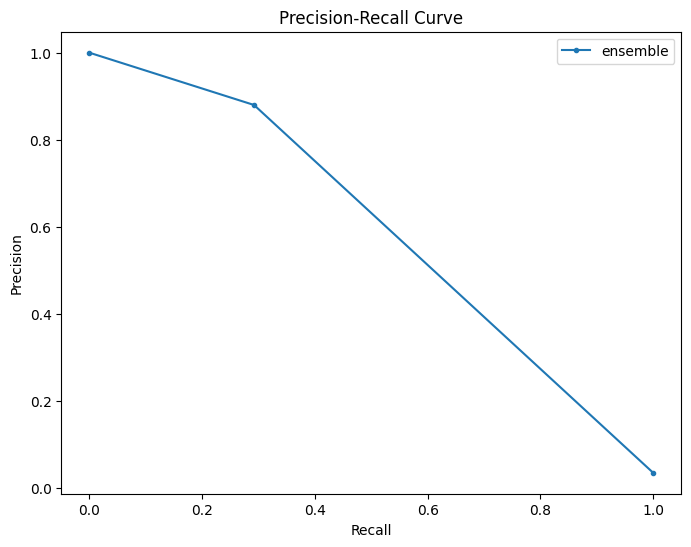

In [22]:
from sklearn.metrics import precision_recall_curve

# 🚀 Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_hard)

# 🚀 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='ensemble')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

🚀 Hard Voting 적용 후 정확도: 95.87%


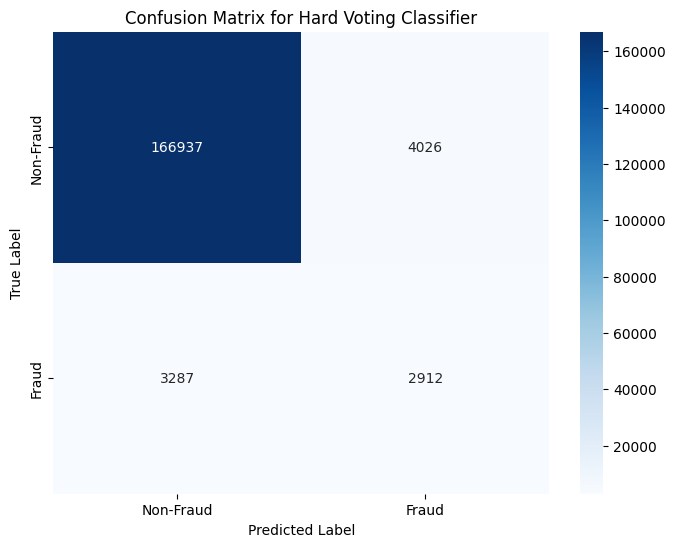

              precision    recall  f1-score   support

   Non-Fraud       0.98      0.98      0.98    170963
       Fraud       0.42      0.47      0.44      6199

    accuracy                           0.96    177162
   macro avg       0.70      0.72      0.71    177162
weighted avg       0.96      0.96      0.96    177162



In [26]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 1️⃣ Train-Test Split (원본 데이터에서 분리)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ 2️⃣ SMOTE 적용 (불균형 데이터 해결)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ✅ 3️⃣ Hard Voting 모델 정의
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1  # 병렬 연산 최적화
)

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    random_state=42,
    tree_method='gpu_hist'  # ✅ GPU 사용 가능하면 활성화
)

logreg_model = LogisticRegression(
    class_weight="balanced", solver='lbfgs', max_iter=300, n_jobs=-1
)

# ✅ Hard Voting 앙상블 모델 생성
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('logreg', logreg_model)],
    voting='hard'  # ✅ Hard Voting 적용 (확률 기반이 아닌 다수결 방식)
)

# ✅ 4️⃣ 모델 학습
voting_model.fit(X_train_resampled, y_train_resampled)

# ✅ 5️⃣ 모델 평가용 데이터(`X_test`)로 예측
y_pred_hard = voting_model.predict(X_test)

# ✅ 6️⃣ 정확도 계산
accuracy = accuracy_score(y_test, y_pred_hard)
print(f"🚀 Hard Voting 적용 후 정확도: {accuracy * 100:.2f}%")

# ✅ 7️⃣ 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Hard Voting Classifier')
plt.show()

# ✅ 8️⃣ 분류 보고서 출력
print(classification_report(y_test, y_pred_hard, target_names=['Non-Fraud', 'Fraud']))


[I 2025-03-13 01:52:26,004] A new study created in memory with name: no-name-d5d73869-db2b-437f-a865-d3925962f122
[I 2025-03-13 01:56:41,184] Trial 0 finished with value: 0.9771847235863221 and parameters: {'n_estimators': 350, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9771847235863221.
[I 2025-03-13 01:58:03,852] Trial 1 finished with value: 0.9636152222259853 and parameters: {'n_estimators': 150, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9771847235863221.
[I 2025-03-13 01:59:11,083] Trial 2 finished with value: 0.9749494812657342 and parameters: {'n_estimators': 100, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9771847235863221.
[I 2025-03-13 02:02:49,557] Trial 3 finished with value: 0.9428884297987153 and parameters: {'n_estimators': 500, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value:

🚀 최적 Decision Threshold: 1.0000
🚀 최적 Threshold(1.0000) 적용 후 정확도: 96.50%


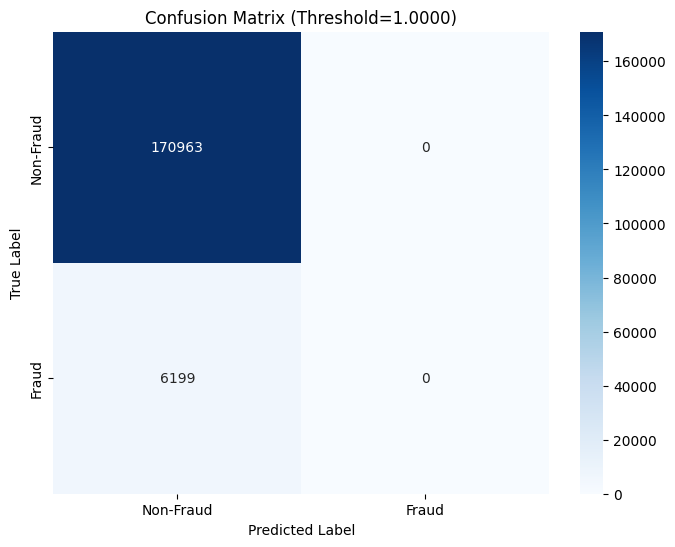

In [29]:
import optuna
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ 1️⃣ Train-Test Split (원본 데이터에서 분리)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ 2️⃣ SMOTE 적용 (불균형 데이터 해결)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# ✅ 3️⃣ Optuna를 활용한 RandomForest 최적화
def optimize_rf(trial):
    """Optuna를 사용하여 RandomForest의 하이퍼파라미터 최적화"""
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=50)
    max_depth = trial.suggest_int("max_depth", 5, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_resampled, y_train_resampled)
    y_pred = rf.predict(X_test)
    return accuracy_score(y_test, y_pred)


study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(optimize_rf, n_trials=10)

# ✅ 4️⃣ Optuna를 활용한 XGBoost 최적화
def optimize_xgb(trial):
    """Optuna를 사용하여 XGBoost의 하이퍼파라미터 최적화"""
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=50)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    max_depth = trial.suggest_int("max_depth", 3, 10)

    xgb = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42,
        tree_method='gpu_hist'  # GPU 사용 가능하면 활성화
    )
    xgb.fit(X_train_resampled, y_train_resampled)
    y_pred = xgb.predict(X_test)
    return accuracy_score(y_test, y_pred)


study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(optimize_xgb, n_trials=10)

# ✅ 5️⃣ 최적화된 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=study_rf.best_params["n_estimators"],
    max_depth=study_rf.best_params["max_depth"],
    min_samples_split=study_rf.best_params["min_samples_split"],
    min_samples_leaf=study_rf.best_params["min_samples_leaf"],
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

xgb_model = XGBClassifier(
    n_estimators=study_xgb.best_params["n_estimators"],
    learning_rate=study_xgb.best_params["learning_rate"],
    max_depth=study_xgb.best_params["max_depth"],
    random_state=42,
    tree_method='gpu_hist'  # GPU 사용 가능하면 활성화
)

logreg_model = LogisticRegression(
    class_weight="balanced", solver='lbfgs', max_iter=300, n_jobs=-1
)

# ✅ 6️⃣ Hard Voting 앙상블 모델 생성
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('logreg', logreg_model)],
    voting='hard'  # ✅ Hard Voting 유지
)

# ✅ 7️⃣ 모델 학습
voting_model.fit(X_train_resampled, y_train_resampled)

# ✅ 8️⃣ 예측 수행 (Hard Voting은 확률값이 없으므로 바로 이진 분류)
y_pred_hard = voting_model.predict(X_test)

# ✅ 9️⃣ Precision-Recall Curve 기반 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_hard)
f1_scores = (2 * precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"🚀 최적 Decision Threshold: {best_threshold:.4f}")

# ✅ 🔟 최적 Threshold 적용하여 이진 분류
y_pred_adjusted = (y_pred_hard > best_threshold).astype(int)

# ✅ 1️⃣1️⃣ 정확도 계산
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"🚀 최적 Threshold({best_threshold:.4f}) 적용 후 정확도: {accuracy * 100:.2f}%")

# ✅ 1️⃣2️⃣ 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold={best_threshold:.4f})')
plt.show()

# ✅


🚀 Threshold(0.35) 적용 후 정확도: 96.11%


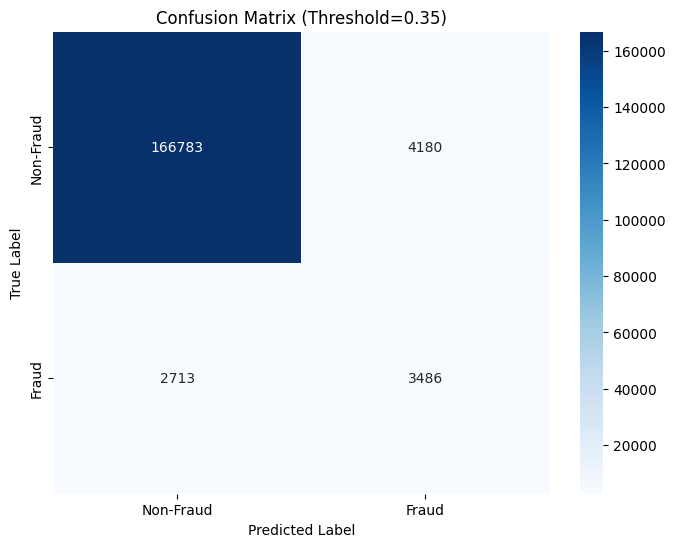

              precision    recall  f1-score   support

   Non-Fraud       0.98      0.98      0.98    170963
       Fraud       0.45      0.56      0.50      6199

    accuracy                           0.96    177162
   macro avg       0.72      0.77      0.74    177162
weighted avg       0.97      0.96      0.96    177162



In [30]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ 1️⃣ Train-Test Split (원본 데이터에서 분리)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ 2️⃣ SMOTE 적용 (불균형 데이터 해결)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ✅ 3️⃣ **Optuna 없이 최적화된 하이퍼파라미터 직접 적용**
rf_model = RandomForestClassifier(
    n_estimators=350,  # Optuna 최적값 적용
    max_depth=9,       # Optuna 최적값 적용
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

xgb_model = XGBClassifier(
    n_estimators=350,  # Optuna 최적값 적용
    learning_rate=0.09644242702972619,  # Optuna 최적값 적용
    max_depth=9,       # Optuna 최적값 적용
    random_state=42,
    tree_method='gpu_hist'  # GPU 사용 가능하면 활성화
)

logreg_model = LogisticRegression(
    class_weight="balanced", solver='lbfgs', max_iter=300, n_jobs=-1
)

# ✅ 4️⃣ Hard Voting 앙상블 모델 생성
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('logreg', logreg_model)],
    voting='hard'  # ✅ Hard Voting 유지
)

# ✅ 5️⃣ 모델 학습
voting_model.fit(X_train_resampled, y_train_resampled)

# ✅ 6️⃣ 예측 수행 (Hard Voting은 확률값이 없으므로 바로 이진 분류)
y_pred_hard = voting_model.predict(X_test)

# ✅ 7️⃣ **Threshold 0.35 적용**
threshold = 0.35
y_pred_adjusted = (y_pred_hard > threshold).astype(int)

# ✅ 8️⃣ 정확도 계산
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"🚀 Threshold({threshold}) 적용 후 정확도: {accuracy * 100:.2f}%")

# ✅ 9️⃣ 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()

# ✅ 1️⃣0️⃣ 분류 보고서 출력
print(classification_report(y_test, y_pred_adjusted, target_names=['Non-Fraud', 'Fraud']))


In [ ]:
# ✅ Kaggle 제출용 데이터(`X_test_kaggle`) 예측
y_pred_proba = voting_model.predict_proba(X_test)[:, 1]  # 확률 예측 (Soft Voting 사용)
sample_submission = pd.read_csv("/content/sample_submission.csv")  # ✅ Kaggle 제공 파일 경로

# ✅ sample_submission.csv에 저장
sample_submission['isFraud'] = y_pred_proba
sample_submission.to_csv('submission__.csv', index=False)

print("🚀 Done! Kaggle submission file saved as submission.csv")

🚀 Done! Kaggle submission file saved as submission.csv


In [28]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.0 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 🚀 Optuna의 목표 함수 정의
def objective(trial):
    # 튜닝할 하이퍼파라미터 범위 설정
    n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)  # 트리 개수 (50~500)
    max_depth = trial.suggest_int("max_depth", 5, 30)  # 최대 깊이 (5~30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)  # 최소 분할 샘플 수 (2~20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)  # 최소 리프 샘플 수 (1~10)

    # RandomForest 모델 생성
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight="balanced",  # 클래스 불균형 처리
        random_state=42,
        n_jobs=-1  # 모든 CPU 코어 사용
    )

    # 데이터 분할 (Optuna 실행 속도 향상을 위해 20% 데이터만 사용)
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # 모델 학습
    rf_model.fit(X_train_opt, y_train_opt)

    # 검증 데이터 예측
    y_pred_opt = rf_model.predict(X_val_opt)

    # 정확도 계산
    accuracy = accuracy_score(y_val_opt, y_pred_opt)

    return accuracy  # Optuna가 최대화할 목표 (높을수록 좋음)

# 🚀 Optuna 최적화 실행 (20번 시도)
study = optuna.create_study(direction="maximize")  # 정확도를 최대화하도록 설정
study.optimize(objective, n_trials=10)  # 20회 시도

# 🚀 최적의 하이퍼파라미터 출력
print("Best trial:", study.best_trial.params)


[I 2025-03-12 07:47:46,248] A new study created in memory with name: no-name-c20b3257-d6b9-48ed-af16-b421de49e0b7
[I 2025-03-12 07:49:16,840] Trial 0 finished with value: 0.9693260438337608 and parameters: {'n_estimators': 300, 'max_depth': 23, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9693260438337608.
[I 2025-03-12 07:50:08,595] Trial 1 finished with value: 0.8789854371280662 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9693260438337608.
[I 2025-03-12 07:51:52,428] Trial 2 finished with value: 0.935495186027384 and parameters: {'n_estimators': 450, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9693260438337608.
[I 2025-03-12 07:52:31,702] Trial 3 finished with value: 0.8667448836421694 and parameters: {'n_estimators': 250, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 0 with valu

Best trial: {'n_estimators': 150, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 1}


In [ ]:
import pandas as pd

# 🚀 Kaggle에서 제공한 sample_submission.csv 파일 불러오기
sample_submission = pd.read_csv("/content/sample_submission.csv")  # ✅ Kaggle 제공 파일 경로

# 🚀 X_test를 Kaggle 제출용 데이터와 동일한 TransactionID 기준으로 가져오기
X_test = X.reindex(sample_submission['TransactionID'])  # ✅ 존재하지 않는 ID는 NaN으로 남김

# ✅ Feature 순서를 동일하게 맞추기
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 🚀 NaN 처리 (필요한 경우)
X_test.fillna(0, inplace=True)  # ✅ NaN을 0으로 대체 (또는 다른 방법으로 처리 가능)

# 🚀 모델 예측 확률 가져오기 (사기일 확률 예측)
sample_submission['isFraud'] = rf_best_model.predict_proba(X_test)[:, 1]

# 🚀 Kaggle 제출용 CSV 저장
sample_submission.to_csv('submission.csv', index=False)

print("🚀 Done! Kaggle submission file saved as submission.csv")


🚀 Done! Kaggle submission file saved as submission.csv


In [ ]:
from imblearn.over_sampling import SMOTE
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🚀 1. Kaggle에서 제공한 sample_submission.csv 파일 불러오기
sample_submission = pd.read_csv("/content/sample_submission.csv")  # ✅ Kaggle 제공 파일 경로

# 🚀 2. X_train, X_test에서 NaN 제거
X_train.fillna(0, inplace=True)  # ✅ NaN을 0으로 대체
X_test.fillna(0, inplace=True)  # ✅ NaN을 0으로 대체

# 🚀 3. SMOTE 적용 (Fraud 데이터 샘플 증가)
print("📌 Before SMOTE:", X_train.shape, y_train.shape)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("📌 After SMOTE:", X_train_resampled.shape, y_train_resampled.shape)  # ✅ 크기가 같아야 정상

# 🚀 4. Optuna가 찾은 최적의 하이퍼파라미터 가져오기
best_params = study.best_trial.params

# 🚀 5. 최적의 하이퍼파라미터로 RandomForest 모델 생성
rf_best_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# 🚀 6. 모델 학습 (SMOTE 적용된 데이터로 학습)
rf_best_model.fit(X_train_resampled, y_train_resampled)

# 🚀 7. Kaggle 제출용 X_test 설정 (TransactionID 기준으로 재정렬)
X_test = X.reindex(sample_submission['TransactionID'])  # ✅ TransactionID 기준으로 재정렬

# 🚀 8. NaN 처리
X_test.fillna(0, inplace=True)  # ✅ NaN을 0으로 대체

# 🚀 9. Feature 순서 동일하게 맞추기
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 🚀 10. 최종 크기 확인
print("📌 최종 X_test 개수:", X_test.shape[0])  # ✅ 506,691개여야 정상

# 🚀 11. 모델 예측 (사기일 확률 예측)
sample_submission['isFraud'] = rf_best_model.predict_proba(X_test)[:, 1]

# 🚀 12. Kaggle 제출용 CSV 저장
sample_submission.to_csv('submission.csv', index=False)

print("🚀 Done! Kaggle submission file saved as submission.csv")


📌 Before SMOTE: (413378, 433) (413378,)
📌 After SMOTE: (598371, 433) (598371,)
📌 최종 X_test 개수: 506691
🚀 Done! Kaggle submission file saved as submission.csv


In [ ]:
from imblearn.over_sampling import SMOTE
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # ✅ NaN 처리 추가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🚀 1. X와 y를 합쳐서 DataFrame 생성
df = X.copy()
df['isFraud'] = y  # `isFraud` 컬럼 추가

# 🚀 2. 정상 거래(Non-Fraud)에서만 이상치 제거 (IQR 기반)
def remove_outliers_iqr(df, columns, threshold=1.5):
    """
    IQR을 이용해 정상 거래(Non-Fraud) 데이터에서만 이상치를 제거하는 함수
    """
    df_cleaned = df.copy()

    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # ✅ 정상 거래(Non-Fraud)에서만 이상치 제거 (Fraud 데이터는 유지)
        df_cleaned = df_cleaned[
            ~((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)) | (df_cleaned['isFraud'] == 1)
        ]

    return df_cleaned

# 특정 수치형 컬럼에서 이상치 제거
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
df_filtered = remove_outliers_iqr(df, numeric_cols, threshold=1.5)

# 🚀 3. X와 y 다시 분리
X_filtered = df_filtered.drop(columns=['isFraud'])
y_filtered = df_filtered['isFraud']

# 🚀 4. NaN 처리 (SimpleImputer 사용)
imputer = SimpleImputer(strategy='median')  # 중앙값으로 NaN 대체
X_filtered_imputed = pd.DataFrame(imputer.fit_transform(X_filtered), columns=X_filtered.columns)

# 🚀 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_filtered_imputed, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered)

# 🚀 6. NaN 확인 (SMOTE 실행 전)
print("📌 NaN 개수 (SMOTE 실행 전):", X_train.isna().sum().sum())  # ✅ 반드시 0이어야 함!

# 🚀 7. SMOTE 적용 (Fraud 데이터 샘플 증가)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 🚀 8. Optuna가 찾은 최적의 하이퍼파라미터 가져오기
best_params = study.best_trial.params

# 🚀 9. 최적의 하이퍼파라미터로 RandomForest 모델 생성
rf_best_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# 🚀 10. 모델 학습 (SMOTE 적용된 데이터로 학습)
rf_best_model.fit(X_train_resampled, y_train_resampled)

# 🚀 11. 테스트 데이터 예측 (SMOTE 미적용 원본 데이터 사용)
y_pred = rf_best_model.predict(X_test)

# 🚀 12. 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"🚀 최적화된 모델의 정확도: {accuracy * 100:.2f}%")

# 🚀 13. 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized RandomForest Classifier (with SMOTE & Outlier Removal)')
plt.show()

# 🚀 14. 분류 보고서 출력
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))


In [ ]:
# 🚀 훈련 데이터 성능 평가
y_train_pred = rf_best_model.predict(X_train_resampled)

# 🚀 테스트 데이터 성능 평가
y_test_pred = rf_best_model.predict(X_test)

# 🚀 정확도 비교
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"🚀 훈련 데이터 정확도: {train_accuracy * 100:.2f}%")
print(f"🚀 테스트 데이터 정확도: {test_accuracy * 100:.2f}%")

# 🚀 F1-Score 비교
from sklearn.metrics import f1_score
train_f1 = f1_score(y_train_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"🚀 훈련 데이터 F1-Score: {train_f1:.2f}")
print(f"🚀 테스트 데이터 F1-Score: {test_f1:.2f}")


🚀 훈련 데이터 정확도: 99.35%
🚀 테스트 데이터 정확도: 99.36%
🚀 훈련 데이터 F1-Score: 0.99
🚀 테스트 데이터 F1-Score: 0.99


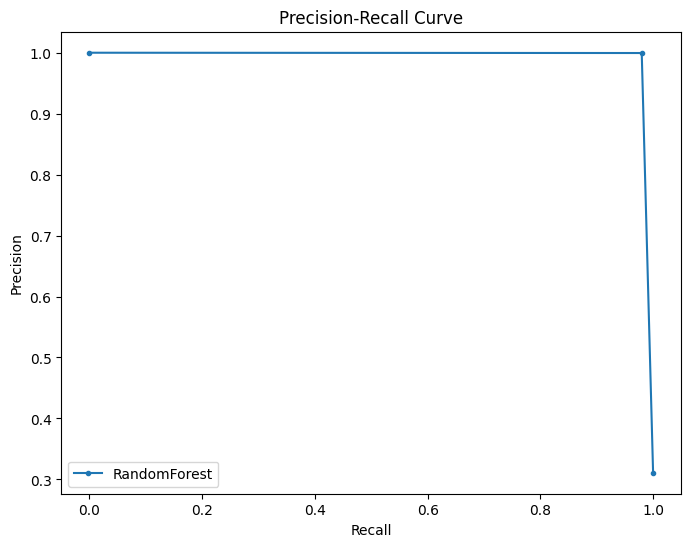

In [ ]:
from sklearn.metrics import precision_recall_curve

# 🚀 Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)

# 🚀 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='RandomForest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # ✅ NaN 처리 추가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing


# 🚀 1. X와 y를 합쳐서 DataFrame 생성
df = X.copy()
df['isFraud'] = y  # `isFraud` 컬럼 추가

# 🚀 2. 정상 거래(Non-Fraud)에서만 이상치 제거 (IQR 기반)
def remove_outliers_iqr(df, columns, threshold=1.5):
    """
    IQR을 이용해 정상 거래(Non-Fraud) 데이터에서만 이상치를 제거하는 함수
    """
    df_cleaned = df.copy()

    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # ✅ 정상 거래(Non-Fraud)에서만 이상치 제거 (Fraud 데이터는 유지)
        df_cleaned = df_cleaned[
            ~((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)) | (df_cleaned['isFraud'] == 1)
        ]

    return df_cleaned

# 특정 수치형 컬럼에서 이상치 제거
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
df_filtered = remove_outliers_iqr(df, numeric_cols, threshold=1.5)

# 🚀 3. X와 y 다시 분리
X_filtered = df_filtered.drop(columns=['isFraud'])
y_filtered = df_filtered['isFraud']

# 🚀 4. NaN 처리 (SimpleImputer 사용)
imputer = SimpleImputer(strategy='median')  # 중앙값으로 NaN 대체
X_filtered_imputed = pd.DataFrame(imputer.fit_transform(X_filtered), columns=X_filtered.columns)

# 🚀 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_filtered_imputed, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered)

# 🚀 6. NaN 확인 (SMOTE 실행 전)
print("📌 NaN 개수 (SMOTE 실행 전):", X_train.isna().sum().sum())  # ✅ 반드시 0이어야 함!

# 🚀 7. SMOTE 적용 (Fraud 데이터 샘플 증가)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 🚀 8. Optuna가 찾은 최적의 하이퍼파라미터 가져오기
best_params = study.best_trial.params

# 🚀 9. 최적의 하이퍼파라미터로 RandomForest 모델 생성
rf_best_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# 🚀 10. 모델 학습 (SMOTE 적용된 데이터로 학습)
rf_best_model.fit(X_train_resampled, y_train_resampled)

# 🚀 11. 테스트 데이터 예측 (SMOTE 미적용 원본 데이터 사용)
#y_pred = rf_best_model.predict(X_test)

# 🚀 sample_submission 생성 (X_test의 인덱스를 사용하여 데이터프레임 생성)
sample_submission = pd.DataFrame({'TransactionID': X_test.index, 'isFraud': rf_best_model.predict_proba(X_test)[:, 1]})

# 🚀 CSV로 저장
sample_submission.to_csv('optuna_and_smote.csv', index=False)

print("🚀 Done! Saved to optuna_and_smote.csv")


📌 NaN 개수 (SMOTE 실행 전): 0
🚀 Done! Saved to optuna_and_smote.csv


In [ ]:
from imblearn.over_sampling import SMOTE
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # ✅ NaN 처리 추가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🚀 1. Kaggle에서 제공한 sample_submission.csv 파일 불러오기
sample_submission = pd.read_csv("/content/sample_submission.csv")  # ✅ Kaggle 제공 파일 경로

In [ ]:
sample_submission['TransactionID']

,TransactionID
0,3663549
1,3663550
2,3663551
3,3663552
4,3663553
...,...
506686,4170235
506687,4170236
506688,4170237
506689,4170238
